<a href="https://colab.research.google.com/github/rubuntu/uaa-417-sistemas-de-gestion-de-bases-de-datos-avanzados/blob/main/08_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
%%capture
!pip install expectexception
import expectexception

In [3]:
import numpy as np

# Pandas

<!-- requirement: data/yelp.json.gz -->
<!-- requirement: data/PEP_2016_PEPANNRES.csv -->

In [4]:
import pandas as pd

Presentamos el módulo Pandas y el objeto DataFrame en la lección sobre [módulos básicos de ciencia de datos](07_Modulos_Basicos_DS.ipynb). Aprendimos a construir un DataFrame, agregar datos, recuperar datos y [leer y escribir en disco de forma básica](06_IO.ipynb). Ahora exploraremos el objeto DataFrame y sus potentes métodos de análisis con más profundidad.

Trabajaremos con un conjunto de datos del sitio de reseñas en línea, Yelp. El archivo se almacena como un archivo JSON comprimido.

In [73]:
%%capture
!mkdir data
!wget -P ./data/ https://raw.githubusercontent.com/rubuntu/uaa-417-sistemas-de-gestion-de-bases-de-datos-avanzados/main/data/yelp.json.gz
!wget -P ./data/ https://raw.githubusercontent.com/rubuntu/uaa-417-sistemas-de-gestion-de-bases-de-datos-avanzados/main/data/PEP_2016_PEPANNRES.csv


In [6]:
!ls -lh ./data/yelp.json.gz

-rw-r--r-- 1 root root 4.2M Sep 30 21:14 ./data/yelp.json.gz


In [7]:
import gzip
import json

with gzip.open('./data/yelp.json.gz', 'r') as f:
    yelp_data = [json.loads(line) for line in f]

yelp_df = pd.DataFrame(yelp_data)
yelp_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


## Pandas DataFrame y Series

El DataFrame de Pandas es un objeto altamente estructurado. Cada fila corresponde a una entidad física o un evento. Pensamos que toda la información de una fila determinada se refiere a un objeto (por ejemplo, una empresa). Cada columna contiene un tipo de datos, tanto semánticamente (por ejemplo, nombres, cantidad de reseñas, calificaciones con estrellas) como sintácticamente.

In [8]:
yelp_df.dtypes

,0
business_id,object
full_address,object
hours,object
open,bool
categories,object
city,object
review_count,int64
name,object
neighborhoods,object
longitude,float64


Podemos hacer referencia a las columnas por nombre, como lo haríamos con un `dict`.

In [9]:
yelp_df['city'].head()

,city
0,Phoenix
1,De Forest
2,De Forest
3,De Forest
4,De Forest


In [10]:
type(yelp_df['city'])

pandas.core.series.Series

Una columna individual es una «Serie» de Pandas. Una «Serie» tiene un «nombre» y un «dtype» (similar a una matriz NumPy). Un «DataFrame» es esencialmente un «dict» de objetos «Serie». La «Serie» tiene un atributo «índice», que etiqueta las filas. El índice es esencialmente un conjunto de claves para hacer referencia a las filas. Podemos tener un índice compuesto de números, cadenas, marcas de tiempo o cualquier objeto de Python que se pueda convertir en hash. El índice también tendrá un tipo homogéneo.

In [11]:
yelp_df['city'].index

RangeIndex(start=0, stop=37938, step=1)

El `DataFrame` tiene un `índice` dado por la unión de los índices de su `Series` constituyente (exploraremos esto más adelante con más detalle). Dado que un `DataFrame` es un `dict` de `Series`, podemos seleccionar una columna y luego una fila usando la notación de corchetes, pero no a la inversa (sin embargo, el método `loc` soluciona este problema).

In [12]:
# this works
yelp_df['city'][100]

'Madison'

In [13]:
%%expect_exception KeyError

# this doesn't
yelp_df[100]['city']

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py in get_loc(self, key)
   3790         try:
-> 3791             return self._engine.get_loc(casted_key)
   3792         except KeyError as err:

index.pyx in pandas._libs.index.IndexEngine.get_loc()

index.pyx in pandas._libs.index.IndexEngine.get_loc()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()

KeyError: 100

The above exception was the direct cause of the following exception:

KeyError                                  Traceback (most recent call last)
<ipython-input-13-54b0a0a83710> in <cell line: 2>()
      1 # this doesn't
----> 2 yelp_df[100]['city']

/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py in __ge

In [14]:
yelp_df.loc[100, 'city']

'Madison'

Comprender la estructura subyacente del objeto `DataFrame` como un `dict` de `Series` le ayudará a evitar errores y le ayudará a pensar en cómo debería comportarse el `DataFrame` cuando comencemos a realizar análisis más complicados.

Podemos _agregar_ datos en un `DataFrame` utilizando métodos como `mean`, `sum`, `count` y `std`. Para ver una colección de estadísticas resumidas para cada columna, podemos utilizar el método `describe`.

In [15]:
yelp_df.describe()

,review_count,longitude,stars,latitude
count,37938.000000,37938.000000,37938.000000,37938.000000
mean,29.300648,-104.097172,3.672914,36.530288
std,92.893064,28.365375,0.888730,5.822588
min,3.000000,-115.369725,1.000000,32.876638
25%,4.000000,-115.136389,3.000000,33.476739
50%,8.000000,-112.068820,3.500000,33.680247
75%,21.000000,-111.883274,4.500000,36.141875
max,4084.000000,-3.050088,5.000000,56.033777


La utilidad de un DataFrame proviene de su capacidad para dividir los datos en grupos, utilizando el método `groupby`, y luego realizar agregaciones personalizadas utilizando el método `apply` o `agregate`. Este proceso de dividir los datos en grupos, aplicar una agregación y luego recopilar los resultados se [analiza en detalle en la documentación de Pandas](https://pandas.pydata.org/pandas-docs/stable/groupby.html), y es uno de los principales objetivos de este cuaderno.

## Construcción de DataFrame

Dado que un `DataFrame` es un `dict` de `Series`, la forma natural de construir un `DataFrame` es utilizar un `dict` de objetos similares a `Series`.

In [16]:
from string import ascii_letters, digits
import datetime

In [50]:
import numpy as np
from string import ascii_letters, digits
import datetime

usernames = ['alice36', 'bob_smith', 'eve']

passwords = [''.join(np.random.choice(list(ascii_letters + digits), 8)) for x in range(3)]
creation_dates = [datetime.datetime.now().date() - datetime.timedelta(days=int(x)) for x in np.random.randint(0, 1500, 3)] # Cast numpy.int64 to int using int(x)

In [51]:
import datetime
from string import ascii_letters, digits

import numpy as np

usernames = ['alice36', 'bob_smith', 'eve']

passwords = [''.join(np.random.choice(list(ascii_letters + digits), 8)) for x in range(3)]
creation_dates = [datetime.datetime.now().date() - datetime.timedelta(days=int(x)) for x in np.random.randint(0, 1500, 3)] # Cast numpy.int64 to int using int(x)

In [19]:
df = pd.DataFrame({'username': usernames, 'password': passwords, 'date-created': creation_dates})
df

,username,password,date-created
0,alice36,CSxcz5qg,2024-05-28
1,bob_smith,UTivgOUx,2022-01-26
2,eve,IA2gfaak,2022-03-05


El `DataFrame` también está estrechamente relacionado con el `ndarray` de NumPy.

In [20]:
random_data = np.random.random((4,3))
random_data

array([[0.38341902, 0.84409116, 0.50577071],
       [0.55351757, 0.10327431, 0.67930434],
       [0.18498929, 0.46858872, 0.03742343],
       [0.73058567, 0.36803951, 0.72167746]])

In [21]:
df_random = pd.DataFrame(random_data, columns=['a', 'b', 'c'])
df_random

,a,b,c
0,0.383419,0.844091,0.505771
1,0.553518,0.103274,0.679304
2,0.184989,0.468589,0.037423
3,0.730586,0.368040,0.721677


Para agregar una nueva columna o fila, simplemente usamos una asignación similar a "dict".

In [22]:
emails = ['alice.chan@gmail.com', 'bwsmith1983@gmail.com', 'fakemail123@yahoo.com']
df['email'] = emails
df

,username,password,date-created,email
0,alice36,CSxcz5qg,2024-05-28,alice.chan@gmail.com
1,bob_smith,UTivgOUx,2022-01-26,bwsmith1983@gmail.com
2,eve,IA2gfaak,2022-03-05,fakemail123@yahoo.com


In [23]:
# loc references index value, NOT position
# for position use iloc
df.loc[3] = ['2015-01-29', '38uzFJ1n', 'melvintherobot', 'moviesrgood@moviesrgood.com']
df

,username,password,date-created,email
0,alice36,CSxcz5qg,2024-05-28,alice.chan@gmail.com
1,bob_smith,UTivgOUx,2022-01-26,bwsmith1983@gmail.com
2,eve,IA2gfaak,2022-03-05,fakemail123@yahoo.com
3,2015-01-29,38uzFJ1n,melvintherobot,moviesrgood@moviesrgood.com


También podemos eliminar columnas y filas.

In [24]:
df.drop(3)

,username,password,date-created,email
0,alice36,CSxcz5qg,2024-05-28,alice.chan@gmail.com
1,bob_smith,UTivgOUx,2022-01-26,bwsmith1983@gmail.com
2,eve,IA2gfaak,2022-03-05,fakemail123@yahoo.com


In [25]:
# to drop a column, need axis=1
df.drop('email', axis=1)

,username,password,date-created
0,alice36,CSxcz5qg,2024-05-28
1,bob_smith,UTivgOUx,2022-01-26
2,eve,IA2gfaak,2022-03-05
3,2015-01-29,38uzFJ1n,melvintherobot


Observe que cuando eliminamos la columna `'email'`, la fila en el índice 3 estaba en el `DataFrame`, ¡a pesar de que recién la eliminamos! La mayoría de las operaciones en Pandas devuelven una _copia_ del `DataFrame`, en lugar de modificar el objeto `DataFrame` en sí. Por lo tanto, para alterar permanentemente el `DataFrame`, necesitamos reasignar la variable `df` o usar la palabra clave `inplace`.

In [26]:
df.drop(3, inplace=True)
df

,username,password,date-created,email
0,alice36,CSxcz5qg,2024-05-28,alice.chan@gmail.com
1,bob_smith,UTivgOUx,2022-01-26,bwsmith1983@gmail.com
2,eve,IA2gfaak,2022-03-05,fakemail123@yahoo.com


Dado que los nombres de las columnas y del índice son importantes para interactuar con los datos en el DataFrame, debemos asegurarnos de configurarlos con valores útiles. Podemos hacerlo durante la construcción o después.

In [27]:
df = pd.DataFrame({'email': emails, 'password': passwords, 'date-created': creation_dates}, index=usernames)
df.index.name = 'users' # it can be helpful to give the index a name
df

,email,password,date-created
users,,,
alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [28]:
# alternatively
df = pd.DataFrame(zip(usernames, emails, passwords, creation_dates))
df

,0,1,2,3
0,alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
1,bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
2,eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [29]:
df.columns = ['username', 'email', 'password', 'date-created']
df.set_index('username', inplace=True)
df

,email,password,date-created
username,,,
alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [30]:
# to reset index to a column
df.reset_index(inplace=True)
df

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
1,bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
2,eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


Podemos tener varios niveles en un índice. Descubriremos que, para algunos conjuntos de datos, es necesario tener varios niveles en el índice para identificar de forma única una fila.

In [31]:
df.set_index(['username', 'email'])

,,password,date-created
username,email,,
alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


### Lectura de datos de un archivo

También podemos construir un DataFrame utilizando datos almacenados en un archivo o recibidos desde un sitio web. La fuente de datos puede ser [JSON](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html), [HTML](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html), [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv), [Excel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html), [Python pickle](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_pickle.html), o incluso una [conexión de base de datos](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql.html). Cada formato tendrá sus propios métodos para leer y escribir datos que toman diferentes argumentos. Los argumentos de estos métodos generalmente dependen del formato particular del archivo. Por ejemplo, los valores en un CSV pueden estar separados por comas o punto y coma, puede tener un encabezado o no.

El método `read_csv` tiene que lidiar con la mayoría de las posibilidades de formato, por lo que exploraremos ese método con algunos ejemplos. Intente aplicar estas ideas cuando trabaje con otros formatos de archivo, pero tenga en cuenta que cada formato y método de lectura es diferente. Siempre consulte [la documentación de Pandas](http://pandas.pydata.org/pandas-docs/stable/io.html) cuando tenga problemas con la lectura o escritura de datos.

In [32]:
csv = [','.join(map(lambda x: str(x), row)) for row in np.vstack([df.columns, df])]
with open('./data/read_csv_example.csv', 'w') as f:
    [f.write(line + '\n') for line in csv]

!cat ./data/read_csv_example.csv

username,email,password,date-created
alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [33]:
pd.read_csv('./data/read_csv_example.csv')

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
1,bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
2,eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [34]:
# we can also set an index from the data
pd.read_csv('./data/read_csv_example.csv', index_col=0)

,email,password,date-created
username,,,
alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [35]:
# what if our data had no header?
with open('./data/read_csv_noheader_example.csv', 'w') as f:
    [f.write(line + '\n') for i, line in enumerate(csv) if i != 0]

!cat ./data/read_csv_noheader_example.csv

alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [37]:
pd.read_csv('./data/read_csv_noheader_example.csv', names=['username', 'email', 'password', 'date-created'], header=None)

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
1,bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
2,eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [38]:
# what if our data was tab-delimited?
tsv = ['\t'.join(map(lambda x: str(x), row)) for row in np.vstack([df.columns, df])]
with open('./data/read_csv_example.tsv', 'w') as f:
    [f.write(line + '\n') for line in tsv]

!cat ./data/read_csv_example.tsv

username	email	password	date-created
alice36	alice.chan@gmail.com	CSxcz5qg	2024-05-28
bob_smith	bwsmith1983@gmail.com	UTivgOUx	2022-01-26
eve	fakemail123@yahoo.com	IA2gfaak	2022-03-05


In [39]:
pd.read_csv('./data/read_csv_example.tsv', delimiter='\t')

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
1,bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
2,eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


Incluso dentro de un único formato de archivo, los datos se pueden organizar y formatear de muchas maneras. Estos han sido solo algunos ejemplos de los tipos de argumentos que podría necesitar usar con `read_csv` para leer datos en un DataFrame de manera organizada.

## Filtrado de DataFrames

Una de las potentes herramientas analíticas de Pandas DataFrame es su sintaxis para filtrar datos. A menudo, solo queremos trabajar con un determinado subconjunto de nuestros datos en función de algunos criterios. Veamos nuestros datos de Yelp como ejemplo.

In [40]:
yelp_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


Vemos que el conjunto de datos de Yelp tiene una columna de "estado". Si solo nos interesan las empresas de Arizona (AZ), podemos filtrar el DataFrame y seleccionar solo esos datos.

In [41]:
az_yelp_df = yelp_df[yelp_df['state'] == 'AZ']
az_yelp_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
297,x5Mv61CnZLohZWxfCVCPTQ,"2819 N Central Ave\nPhoenix, AZ 85004",{},True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,12,Domino's Pizza,[],-112.073418,AZ,2.5,33.479542,"{'Take-out': True, 'Wi-Fi': 'no', 'Alcohol': '...",business
298,2ZnCITVa0abGce4gZ6RhIw,"1850 N Central Ave\nPhoenix, AZ 85004",{},True,"[American (New), Sandwiches, Restaurants]",Phoenix,5,Viad Tower Restaurants,[],-112.074315,AZ,3.5,33.468988,"{'Take-out': True, 'Noise Level': 'quiet', 'De...",business
299,EmzaQR5hQlF0WIl24NxAZA,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '02:00', 'open': '21:00'}...",True,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,20,Sky Lounge,[],-112.071702,AZ,2.5,33.448399,"{'Alcohol': 'full_bar', 'Price Range': 1, 'Noi...",business
300,SiwN7f0N4bs4ZtPc4yPgiA,"710 N Central Ave\nPhoenix, AZ 85004",{},True,"[Nightlife, Dance Clubs]",Phoenix,15,Palazzo,[],-112.074225,AZ,2.5,33.456068,"{'Price Range': 2, 'Alcohol': 'full_bar', 'Goo...",business


In [42]:
az_yelp_df['state'].unique()

array(['AZ'], dtype=object)

Podemos combinar criterios mediante lógica. ¿Qué pasa si solo nos interesan las empresas con más de 10 reseñas en Arizona?

In [43]:
yelp_df[(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10)].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
297,x5Mv61CnZLohZWxfCVCPTQ,"2819 N Central Ave\nPhoenix, AZ 85004",{},True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Phoenix,12,Domino's Pizza,[],-112.073418,AZ,2.5,33.479542,"{'Take-out': True, 'Wi-Fi': 'no', 'Alcohol': '...",business
299,EmzaQR5hQlF0WIl24NxAZA,"132 E Washington St\nPhoenix, AZ 85004","{'Sunday': {'close': '02:00', 'open': '21:00'}...",True,"[American (New), Nightlife, Dance Clubs, Resta...",Phoenix,20,Sky Lounge,[],-112.071702,AZ,2.5,33.448399,"{'Alcohol': 'full_bar', 'Price Range': 1, 'Noi...",business
300,SiwN7f0N4bs4ZtPc4yPgiA,"710 N Central Ave\nPhoenix, AZ 85004",{},True,"[Nightlife, Dance Clubs]",Phoenix,15,Palazzo,[],-112.074225,AZ,2.5,33.456068,"{'Price Range': 2, 'Alcohol': 'full_bar', 'Goo...",business
301,M-MFa0YErVBbFW2IJhGJmw,"386 E Virginia Ave\nPhoenix, AZ 85004","{'Tuesday': {'close': '18:00', 'open': '07:30'...",True,"[Auto Repair, Automotive, Tires, Oil Change St...",Phoenix,28,Virginia Auto Service,[],-112.065806,AZ,4.0,33.476784,{},business
302,KPoTixdjoJxSqRSEApSAGg,"2631 N Central Ave\nPhoenix, AZ 85004","{'Monday': {'close': '21:00', 'open': '11:00'}...",True,"[Thai, Restaurants]",Phoenix,281,Wild Thaiger,[],-112.073524,AZ,4.0,33.477934,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business


¿Cómo funciona este filtrado?

Cuando escribimos `yelp_df['state'] == 'AZ'`, Pandas selecciona la columna `'state'` y comprueba si cada fila es `'AZ'`. Si es así, esa fila se marca como `'True``, y si no, se marca como `'False``. Así es como normalmente esperaríamos que funcionara un condicional, solo que ahora se aplica a una `Series` completa de Pandas. Terminamos con una `Series` de Pandas de variables booleanas.

In [44]:
(yelp_df['state'] == 'AZ').head()

,state
0,True
1,False
2,False
3,False
4,False


Podemos utilizar una 'Serie' (o cualquier objeto similar) de variables booleanas para indexar el DataFrame.

In [45]:
df

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
1,bob_smith,bwsmith1983@gmail.com,UTivgOUx,2022-01-26
2,eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


In [46]:
df[[True, False, True]]

,username,email,password,date-created
0,alice36,alice.chan@gmail.com,CSxcz5qg,2024-05-28
2,eve,fakemail123@yahoo.com,IA2gfaak,2022-03-05


Esto nos permite filtrar un DataFrame usando expresiones lógicas idiomáticas como `yelp_df['review_count'] > 10`.

Como otro ejemplo, consideremos la columna `'open'`, que es un indicador `True`/`False` que indica si una empresa está abierta. Esta también es una `Series` booleana de Pandas, por lo que podemos usarla directamente.

In [47]:
# the open businesses
yelp_df[yelp_df['open']].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
0,vcNAWiLM4dR7D2nwwJ7nCA,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{'Tuesday': {'close': '17:00', 'open': '08:00'...",True,"[Doctors, Health & Medical]",Phoenix,7,"Eric Goldberg, MD",[],-111.983758,AZ,3.5,33.499313,{'By Appointment Only': True},business
1,JwUE5GmEO-sH1FuwJgKBlQ,"6162 US Highway 51\nDe Forest, WI 53532",{},True,[Restaurants],De Forest,26,Pine Cone Restaurant,[],-89.335844,WI,4.0,43.238893,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
2,uGykseHzyS5xAMWoN6YUqA,"505 W North St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '06:00'}...",True,"[American (Traditional), Restaurants]",De Forest,16,Deforest Family Restaurant,[],-89.353437,WI,4.0,43.252267,"{'Take-out': True, 'Good For': {'dessert': Fal...",business
3,LRKJF43s9-3jG9Lgx4zODg,"4910 County Rd V\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '10:30'}...",True,"[Food, Ice Cream & Frozen Yogurt, Fast Food, R...",De Forest,7,Culver's,[],-89.374983,WI,4.5,43.251045,"{'Take-out': True, 'Wi-Fi': 'free', 'Takes Res...",business
4,RgDg-k9S5YD_BaxMckifkg,"631 S Main St\nDe Forest, WI 53532","{'Monday': {'close': '22:00', 'open': '11:00'}...",True,"[Chinese, Restaurants]",De Forest,3,Chang Jiang Chinese Kitchen,[],-89.343722,WI,4.0,43.240875,"{'Take-out': True, 'Has TV': False, 'Outdoor S...",business


In [48]:
# the closed businesses
yelp_df[~yelp_df['open']].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
5,oLctHIA1AxmsgOuu4dM6Vw,"4156 County Rd B\nMc Farland, WI 53558",{},False,"[Television Stations, Mass Media]",Mc Farland,10,Charter Communications,[],-89.322920,WI,1.5,42.968507,{},business
14,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,WI,4.0,43.093265,"{'Take-out': True, 'Caters': True, 'Attire': '...",business
16,77ESrCo7hQ96VpCWWdvoxg,"6230 University Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '06:00'}...",False,"[Mexican, Restaurants]",Middleton,17,Mi Cocina,[],-89.487487,WI,3.0,43.091061,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business
50,IEmqrFe96NOhU07TA0rZdw,"6625 Century Ave\nMiddleton, WI 53562",{},False,"[American (Traditional), Restaurants]",Middleton,7,Stamm House At Pheasant Branch,[],-89.494422,WI,2.0,43.104535,"{'Alcohol': 'full_bar', 'Attire': 'casual', 'P...",business
62,mbtGl2I2A2To-8jiggN99g,"6661 University Ave\nSte 103\nMiddleton, WI 53562","{'Tuesday': {'close': '20:00', 'open': '10:00'...",False,"[Skin Care, Hair Salons, Beauty & Spas]",Middleton,7,Tangles,[],-89.497265,WI,2.0,43.096650,"{'By Appointment Only': True, 'Parking': {'gar...",business


Observa que en una expresión anterior escribimos `(yelp_df['state'] == 'AZ') & (yelp_df['review_count'] > 10)`. Normalmente, en Python usamos la palabra `and` cuando trabajamos con lógica. En Pandas, tenemos que usar operadores lógicos _bit a bit_; todo lo que es importante saber son las siguientes equivalencias:

`~` = `not`    
`&` = `and`    
`|` = `or`    

También podemos usar las [operaciones de cadena](https://pandas.pydata.org/pandas-docs/stable/text.html) integradas de Panda para hacer coincidencias de patrones. Por ejemplo, hay muchas empresas en Las Vegas en nuestro conjunto de datos. Sin embargo, también hay empresas en 'Las Vegas East' y 'South Las Vegas'. Para obtener todas las empresas de Las Vegas, podría hacer lo siguiente.

In [52]:
vegas_yelp_df = yelp_df[yelp_df['city'].str.contains('Vegas')]
vegas_yelp_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type
4348,uzztTCsg3XAKlYqmLO40aw,"5835 S Eastern Ave\nSoutheast\nLas Vegas, NV 8...","{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Arts & Entertainment, Shopping, Books, Mags, ...",Las Vegas,7,Psychic Eye Book Shops,[Southeast],-115.119422,NV,4.5,36.083936,"{'Parking': {'garage': False, 'street': False,...",business
4360,IspFZDcpu9W5NvvJ7QgJZg,The Forum Shops At Caesars\n3500 Las Vegas Blv...,"{'Monday': {'close': '21:00', 'open': '10:00'}...",True,"[Women's Clothing, Men's Clothing, Fashion, Sh...",Las Vegas,6,Gap,[Eastside],-115.146372,NV,4.5,36.124423,"{'Parking': {'garage': True, 'street': False, ...",business
4364,Dvulg9cc3XHkt5DkBUekhw,467 E Silverado Ranch Blvd\nSte 175\nSoutheast...,{},True,"[Hair Salons, Beauty & Spas]",Las Vegas,10,Great Clips,[Southeast],-115.153303,NV,2.5,36.012150,"{'By Appointment Only': False, 'Parking': {'ga...",business
4441,_SM8UKIwBNbmj1r629ipoQ,"1916 Village Center Cir\nSummerlin\nLas Vegas,...","{'Monday': {'close': '23:00', 'open': '11:00'}...",False,"[Wine Bars, Bars, Restaurants, Nightlife, Ital...",Las Vegas,9,Chianti Cafe,[Summerlin],-115.304396,NV,3.5,36.192414,"{'Alcohol': 'full_bar', 'Music': {'video': Fal...",business
4489,Zaw0IAXwopKX4MV23MHQRw,"2718 E Tropicana Avenue\nEastside\nLas Vegas, ...",{},True,"[Car Wash, Automotive]",Las Vegas,3,Terrible Herbst,"[Eastside, Southeast]",-115.113492,NV,1.5,36.100507,{},business


In [53]:
vegas_yelp_df['city'].unique()

array(['Las Vegas', 'North Las Vegas', 'N Las Vegas', 'N. Las Vegas',
       'C Las Vegas', 'Las Vegas ', 'Las Vegas, NV 89147',
       'Las Vegas East', 'North Las Vegas ', 'N E Las Vegas',
       'N W Las Vegas', 'Lake Las Vegas', 'South Las Vegas'], dtype=object)

## Aplicación de funciones y agregación de datos

Para analizar los datos en el marco de datos, necesitaremos poder aplicarles funciones. Pandas ya tiene muchas funciones matemáticas integradas, y los marcos de datos y las series se pueden pasar a funciones de NumPy (ya que se comportan como matrices de NumPy).

In [54]:
log_review_count = np.log(yelp_df['review_count'])
print(log_review_count.head())
print(log_review_count.shape)

0    1.945910
1    3.258097
2    2.772589
3    1.945910
4    1.098612
Name: review_count, dtype: float64
(37938,)


In [55]:
mean_review_count = yelp_df['review_count'].mean()
print(mean_review_count)

29.300648426379883


En el primer ejemplo, tomamos el _logaritmo_ del recuento de reseñas de cada negocio. En el segundo caso, calculamos el recuento de reseñas promedio de todos los negocios. En el primer caso, terminamos con un número para cada negocio. _Transformamos_ el recuento de reseñas utilizando el logaritmo. En el segundo caso, _resumimos_ el recuento de reseñas de todos los negocios en un solo número. Este resumen es una forma de _agregación de datos_, en la que tomamos muchos puntos de datos y los combinamos en una representación más pequeña. Las funciones que aplicamos a nuestros conjuntos de datos estarán en la categoría de **transformaciones** o **agregaciones**.

A veces necesitaremos transformar nuestros datos para que sean utilizables. Por ejemplo, en la columna `'atributos'` de nuestro DataFrame, tenemos un `dict` para cada negocio que enumera todas sus propiedades. Si quisiera encontrar un restaurante que ofrezca servicio de entrega, me resultaría difícil filtrar el DataFrame, aunque esa información esté en la columna `'atributos'`. Primero, necesito transformar el `dict` en algo más útil.

In [56]:
def get_delivery_attr(attr_dict):
    return attr_dict.get('Delivery')

Si le damos a esta función un `dict` de la columna `'attributes'`, buscará la clave `'Delivery'`. Si encuentra esa clave, devolverá el valor. Si no encuentra la clave, devolverá ninguno.

In [57]:
print(get_delivery_attr(yelp_df.loc[0, 'attributes']))
print(get_delivery_attr(yelp_df.loc[1, 'attributes']))
print(get_delivery_attr(yelp_df.loc[2, 'attributes']))

None
False
False


Podríamos iterar sobre las filas de `yelp_df['attributes']` para obtener todos los valores, pero hay una mejor manera. DataFrames y Series tienen un método `apply` que nos permite aplicar nuestra función a todo el conjunto de datos a la vez, como hicimos antes con `np.log`.

In [58]:
delivery_attr = yelp_df['attributes'].apply(get_delivery_attr)
delivery_attr.head()

,attributes
0,None
1,False
2,False
3,False
4,None


Podemos crear una nueva columna en nuestro DataFrame con esta información transformada (y útil).

In [59]:
yelp_df['delivery'] = delivery_attr

# to find businesses that deliver
yelp_df[yelp_df['delivery'].fillna(False)].head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery
21,KTqNU4plO23583DYAMGXYg,"2411 Allen Blvd\nMiddleton, WI 53562",{},True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Middleton,3,Domino's Pizza,[],-89.486219,WI,3.0,43.100384,"{'Take-out': True, 'Takes Reservations': False...",business,True
64,oc0rCahXOaJeHLzzDdSfyA,"1901 Cayuga St\nMiddleton, WI 53562",{},False,[Restaurants],Middleton,3,Soup Factory,[],-89.513737,WI,3.0,43.096359,"{'Take-out': True, 'Alcohol': 'none', 'Takes R...",business,True
75,OC8AUJshLVimn_-P_INvJw,"330 W Main St\nSun Prairie, WI 53590","{'Monday': {'close': '23:00', 'open': '11:00'}...",True,"[Sandwiches, Pizza, Chicken Wings, Restaurants]",Sun Prairie,4,Pizza Pit,[],-89.218527,WI,2.5,43.183277,"{'Take-out': True, 'Good For': {'dessert': Fal...",business,True
79,NDAxF0_RCZBQedVO_d5WnA,"984 W Main St\nSun Prairie, WI 53590",{},True,"[Chinese, Restaurants]",Sun Prairie,9,Chang Jiang,[],-89.230477,WI,3.0,43.180786,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business,True
82,5uxhIGZlJm9g_zfG_83z5Q,"2091 McCoy Rd\nSun Prairie, WI 53590",{},True,"[Chinese, Restaurants]",Sun Prairie,6,Peking Chinese Restaurant,[],-89.248245,WI,3.0,43.175381,"{'Delivery': True, 'Waiter Service': True, 'Ta...",business,True


Es menos común (aunque posible) usar `apply` en un DataFrame completo en lugar de solo en una columna. Dado que un DataFrame puede contener muchos tipos de datos, normalmente no querremos aplicar la misma transformación o agregación en todas las columnas.

## Agregación de datos con `groupby`

La agregación de datos es un término [_sobrecargado_](https://en.wikipedia.org/wiki/Function_overloading). Se refiere tanto al resumen de datos (como se mencionó anteriormente) como a la combinación de diferentes conjuntos de datos.

Con nuestros datos de Yelp, podríamos estar interesados ​​en comparar las calificaciones de estrellas de las empresas en diferentes ciudades. Podríamos calcular la calificación de estrellas promedio para cada ciudad, y esto nos permitiría compararlas fácilmente. Primero tendríamos que dividir nuestros datos por ciudad, calcular la media para cada ciudad y luego combinarlos nuevamente al final. Este procedimiento se conoce como [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html) y es un ejemplo clásico de agregación de datos (en el sentido tanto de resumir datos como de combinar diferentes conjuntos de datos).

Logramos la división y la recombinación utilizando el método `groupby`.

In [60]:
stars_by_city = yelp_df.groupby('city')['stars'].mean()
stars_by_city.head()

,stars
city,
Ahwatukee,3.687500
Anthem,3.781818
Apache Junction,3.637500
Arcadia,5.000000
Atlanta,3.500000


También podemos aplicar varias funciones a la vez. Puede resultar útil conocer la desviación estándar de las calificaciones con estrellas, la cantidad total de reseñas y también el recuento de empresas.

In [63]:
agg_by_city = yelp_df.groupby('city').agg(
    mean_stars=('stars', 'mean'),
    std_stars=('stars', 'std'),
    total_reviews=('review_count', 'sum'),
    total_businesses=('business_id', 'count')
)

agg_by_city.head()


,mean_stars,std_stars,total_reviews,total_businesses
city,,,,
Ahwatukee,3.687500,1.066955,258,8
Anthem,3.781818,0.756231,727,55
Apache Junction,3.637500,1.028010,853,80
Arcadia,5.000000,NaN,4,1
Atlanta,3.500000,NaN,16,1


¿Cómo funciona esto? ¿Qué hace `groupby`? Comencemos por inspeccionar el resultado de `groupby`.

Vamos a desglosar paso a paso cómo funciona el código:

### 1. **`yelp_df.groupby('city')`**:
   - **Propósito**: Agrupar el DataFrame `yelp_df` por la columna `'city'`. Esto significa que todas las filas del DataFrame que tengan el mismo valor en la columna `'city'` se agrupan en un solo conjunto.
   - **Resultado**: Crea un objeto de grupo (`groupby`) que organiza los datos por ciudad. Esto no realiza ninguna operación sobre los datos aún, pero permite realizar operaciones agregadas sobre cada ciudad más adelante.

### 2. **`.agg()`**:
   - **Propósito**: Aplicar funciones de agregación (como `mean`, `std`, `sum`, etc.) a las columnas específicas de cada grupo (en este caso, cada ciudad).
   - **Formato**:
     ```python
     .agg(
         nuevo_nombre_columna=('columna_original', 'función_agrupada')
     )
     ```
     Aquí, se especifica un nuevo nombre para la columna resultante seguido por una tupla con el nombre de la columna sobre la que se aplica la función y la función misma.

### 3. **Agregaciones dentro de `agg()`**:
   Dentro del método `agg()`, se especifican las operaciones a realizar para cada columna:
   
   - **`mean_stars=('stars', 'mean')`**:
     - **Propósito**: Calcula el promedio de la columna `'stars'` (puntuación) para cada ciudad.
     - **Resultado**: Para cada ciudad, se genera una nueva columna en el resultado llamada `mean_stars`, que contiene la media de las puntuaciones (`'stars'`) para esa ciudad.

   - **`std_stars=('stars', 'std')`**:
     - **Propósito**: Calcula la desviación estándar de la columna `'stars'` para cada ciudad.
     - **Resultado**: Se genera una columna llamada `std_stars` que contiene la desviación estándar de las puntuaciones para cada ciudad.

   - **`total_reviews=('review_count', 'sum')`**:
     - **Propósito**: Suma todos los valores de la columna `'review_count'` para cada ciudad, lo que da el número total de reseñas para esa ciudad.
     - **Resultado**: Se genera una columna llamada `total_reviews`, que contiene la suma de todas las reseñas para esa ciudad.

   - **`total_businesses=('business_id', 'count')`**:
     - **Propósito**: Cuenta cuántas filas (negocios) hay en cada ciudad. Esto se hace contando el número de veces que aparece `'business_id'` en cada grupo.
     - **Resultado**: Se genera una columna llamada `total_businesses`, que contiene el número total de negocios en cada ciudad.

### 4. **`agg_by_city.head()`**:
   - **Propósito**: Mostrar las primeras 5 filas del DataFrame resultante `agg_by_city` que contiene los resultados de las agregaciones.
   - **Resultado**: Imprime las primeras 5 ciudades junto con las columnas calculadas: `mean_stars`, `std_stars`, `total_reviews`, y `total_businesses`.

### Resumen del resultado:
- El DataFrame final `agg_by_city` contiene una fila por cada ciudad con las siguientes columnas:
  - **`mean_stars`**: Promedio de puntuaciones (`'stars'`) para esa ciudad.
  - **`std_stars`**: Desviación estándar de las puntuaciones.
  - **`total_reviews`**: Total de reseñas para los negocios de esa ciudad.
  - **`total_businesses`**: Cantidad de negocios registrados en esa ciudad.

Este enfoque te permite resumir y obtener estadísticas de varias columnas en función de los grupos creados por la columna `'city'`.

## Ordenación

Aunque el DataFrame se comporta de forma similar a un `dict` en muchos sentidos, también está ordenado. Por lo tanto, podemos ordenar los datos que contiene. Pandas ofrece dos métodos de ordenación, `sort_values` y `sort_index`.

In [70]:
yelp_df.sort_values('stars').head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery
36220,2Q2tZ0yQo25cni0PT2j0Zw,"6420 Spring Mountain Rd\nChinatown\nLas Vegas,...",{},True,"[Real Estate Services, Property Management, Ho...",Las Vegas,3,Total Real Eatate of Nevada,[Chinatown],-115.232316,NV,1.0,36.125870,{},business,None
27946,cHvL85QIV-L2-YlLOcwlCw,"5235 S Kyrene Rd\nSte 106\nTempe, AZ 85283","{'Monday': {'close': '18:00', 'open': '10:00'}...",True,"[Sporting Goods, Shopping, Golf Equipment, Out...",Tempe,3,Custom Golf Center,[],-111.945955,AZ,1.0,33.376734,{},business,None
36332,e23Sa3FCTaIOSZzJsT8sIQ,"3949 N Drinkwater Blvd\nScottsdale, AZ 85251",{},True,"[Professional Services, Internet Service Provi...",Scottsdale,3,Cox Cable,[],-111.921620,AZ,1.0,33.493469,{},business,None
7488,fZO5Fghc6Q07jU8EROzj6Q,"2431 E Laurel St\nMesa, AZ 85213",{},True,"[Home Services, Pool Cleaners]",Mesa,6,Foster's Pool Service & Repair,[],-111.778212,AZ,1.0,33.457833,{},business,None
3370,JjdjS5n6ILh-d3GeTD6qkA,"15820 N 84th St\nSte 25\nScottsdale, AZ 85260","{'Monday': {'close': '17:00', 'open': '09:00'}...",True,"[Hotels & Travel, Motorcycle Rental]",Scottsdale,3,Top Spoke Rentals,[],-111.900187,AZ,1.0,33.629858,{},business,None


In [71]:
yelp_df.set_index('business_id').sort_index().head()

,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery
business_id,,,,,,,,,,,,,,,
--1emggGHgoG6ipd_RMb-g,"3280 S Decatur Blvd\nWestside\nLas Vegas, NV 8...",{},True,"[Food, Convenience Stores]",Las Vegas,4,Sinclair,[Westside],-115.207238,NV,4.0,36.130531,"{'Parking': {'garage': False, 'street': False,...",business,None
--4Pe8BZ6gj57VFL5mUE8g,"21001 North Tatum Blvd. #24\nPhoenix, AZ 85050",{},True,"[Shopping, Office Equipment]",Phoenix,5,Office Max,[],-111.974607,AZ,3.0,33.678615,"{'Parking': {'garage': False, 'street': False,...",business,None
--5jkZ3-nUPZxUvtcbr8Uw,"1336 N Scottsdale Rd\nScottsdale, AZ 85257","{'Monday': {'close': '21:00', 'open': '11:00'}...",True,"[Greek, Restaurants]",Scottsdale,42,Mika's Greek,[],-111.926908,AZ,4.5,33.463373,"{'Take-out': True, 'Wi-Fi': 'no', 'Good For': ...",business,False
--BlvDO_RG2yElKu9XA1_g,"14870 N Northsight Blvd\nSte 103\nScottsdale, ...","{'Monday': {'close': '21:00', 'open': '10:30'}...",True,"[Sushi Bars, Hawaiian, Chinese, Restaurants]",Scottsdale,65,Asian Island,[],-111.897836,AZ,4.0,33.620568,"{'Take-out': True, 'Wi-Fi': 'free', 'Good For'...",business,True
--Dl2rW_xO8GuYBomlg9zw,"4505 S Maryland Pkwy\nUniversity\nLas Vegas, N...",{},True,"[Medical Centers, Health & Medical]",Las Vegas,6,UNLV Student Health Center,[University],-115.141514,NV,4.0,36.110940,{'By Appointment Only': True},business,None


No olvide que la mayoría de las operaciones de Pandas devuelven una copia del DataFrame y no actualizan el DataFrame en su lugar (¡a menos que se lo indiquemos!).

## Uniendo data sets

A menudo, querremos ampliar un conjunto de datos con datos de otro. Por ejemplo, las empresas de las grandes ciudades probablemente obtengan más reseñas que las de las ciudades pequeñas. Podría ser útil escalar el recuento de reseñas según la población de la ciudad. Para ello, necesitaremos añadir datos de población a los datos de Yelp. Podemos obtener datos de población del censo de EE. UU.

In [74]:
census = pd.read_csv('./data/PEP_2016_PEPANNRES.csv', skiprows=[1])

census.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,0610000US0900104720,900104720,"Bethel town, Fairfield County, Connecticut",18584.0,18584,18642,18942,19150,19267,19316,19463,19627
1,0610000US0900108070,900108070,"Bridgeport town, Fairfield County, Connecticut",144229.0,144236,144912,146226,146962,147666,147560,147090,145936
2,0610000US0900108980,900108980,"Brookfield town, Fairfield County, Connecticut",16452.0,16452,16483,16635,16785,16859,17016,17087,17098
3,0610000US0900118500,900118500,"Danbury town, Fairfield County, Connecticut",80893.0,80903,81356,82182,82788,83678,83687,84236,84992
4,0610000US0900118850,900118850,"Darien town, Fairfield County, Connecticut",20732.0,20732,20777,20975,21127,21342,21641,21718,21744


In [75]:
# construct city & state fields
census['city'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[0])
census['state'] = census['GEO.display-label'].apply(lambda x: x.split(', ')[2])

In [76]:
# convert state names to abbreviations

print(census['state'].unique())

['Connecticut' 'Illinois' 'Indiana' 'Kansas' 'Maine' 'Massachusetts'
 'Michigan' 'Minnesota' 'Missouri' 'Nebraska' 'New Hampshire' 'New Jersey'
 'New York' 'North Dakota' 'Ohio' 'Pennsylvania' 'Rhode Island'
 'South Dakota' 'Vermont' 'Wisconsin']


In [77]:
state_abbr = dict(zip(census['state'].unique(), ['CT', 'IL', 'IN', 'KS', 'ME', 'MA', 'MI', 'MN', 'MO', 'NE', 'NH', 'NJ', 'NY', 'ND', 'OH', 'PA', 'RI', 'SD', 'VT', 'WI']))

In [78]:
census['state'] = census['state'].replace(state_abbr)

In [79]:
# remove last word (e.g. 'city', 'town', township', 'borough', 'village') from city names

census['city'] = census['city'].apply(lambda x: ' '.join(x.split(' ')[:-1]))

In [80]:
merged_df = yelp_df.merge(census, on=['state', 'city'])
merged_df.head()

,business_id,full_address,hours,open,categories,city,review_count,name,neighborhoods,longitude,...,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016
0,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
1,HxPpZSY6Q1eARuiahhra6A,"6401 University Ave\nMiddleton, WI 53562",{},False,"[Event Planning & Services, Party & Event Plan...",Middleton,5,Crandalls Carryout & Catering,[],-89.491800,...,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
2,SKLw05kEIlZcpTD5pqma8Q,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",True,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,41,Imperial Garden Chinese Restaurant,[],-89.485169,...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109
3,SKLw05kEIlZcpTD5pqma8Q,"2039 Allen Blvd\nMiddleton, WI 53562","{'Monday': {'close': '14:00', 'open': '11:00'}...",True,"[Party & Event Planning, Asian Fusion, Event P...",Middleton,41,Imperial Garden Chinese Restaurant,[],-89.485169,...,"Middleton town, Dane County, Wisconsin",5877.0,5831,5845,5943,6030,6086,6140,6179,6257
4,77ESrCo7hQ96VpCWWdvoxg,"6230 University Ave\nMiddleton, WI 53562","{'Monday': {'close': '21:00', 'open': '06:00'}...",False,"[Mexican, Restaurants]",Middleton,17,Mi Cocina,[],-89.487487,...,"Middleton city, Dane County, Wisconsin",17442.0,17558,17622,17903,18271,18522,18694,18955,19109


La función `merge` examina las columnas `'state'` y `'city'` de `yelp_df` y `census` e intenta hacer coincidir las filas que comparten valores. Cuando se encuentra una coincidencia, las filas se combinan. ¿Qué sucede cuando no se encuentra una coincidencia? Podemos imaginar cuatro escenarios:

1. Solo conservamos las filas de `yelp_df` y `census` si coinciden. Cualquier fila de cualquiera de las tablas que no tenga coincidencia se descarta. Esto se llama una _unión interna_.

2. Conservamos todas las filas de `yelp_df` y `census`, incluso si no tienen ninguna coincidencia. En este caso, cuando una fila en `yelp_df` no tiene ninguna coincidencia en `census`, todas las columnas de `census` se fusionan con valores nulos. Cuando una fila en `census` no tiene ninguna coincidencia en `yelp_df`, todas las columnas de `yelp_df` se fusionan con valores nulos. Esto se denomina _unión externa_.

3. Privilegiamos los datos `yelp_df`. Si una fila en `yelp_df` no tiene coincidencia en `census`, la conservamos y completamos las columnas `census` faltantes como valores nulos. Si una fila en `census` no tiene coincidencia en `yelp_df`, la descartamos. Esto se denomina _unión izquierda_.

4. Privilegiamos los datos `census`. Esto se denomina _unión derecha_.

El comportamiento predeterminado para Pandas es el caso n.° 1, la _unión interna_. Esto significa que si hay ciudades en `yelp_df` para las que no tenemos datos `census` coincidentes, se descartan. Por lo tanto, `merged_df` puede ser más pequeño que `yelp_df`.

In [83]:
print(yelp_df.shape)
print(merged_df.shape)

(37938, 16)
(3598, 28)


Hay muchas ciudades en `yelp_df` que no están en `census`. Es posible que queramos conservar estas filas, pero no necesitamos ningún dato del censo en el que no haya empresas. En ese caso, deberíamos utilizar una combinación _left join_.

In [85]:
merged_df = yelp_df.merge(census, on=['state', 'city'], how='left')
print(yelp_df.shape)
print(merged_df.shape)

(37938, 16)
(39648, 28)


A veces no necesitamos fusionar las columnas de conjuntos de datos separados, sino que simplemente necesitamos agregar más filas. Por ejemplo, el sistema de metro de la ciudad de Nueva York [publica datos sobre cuántos clientes entran y salen de la estación cada semana](http://web.mta.info/developers/turnstile.html). Cada conjunto de datos semanal tiene las mismas columnas, por lo que si queremos varias semanas de datos, simplemente tenemos que agregar una semana a otra.

In [86]:
nov18 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171118.txt')
nov11 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171111.txt')

In [87]:
nov18.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,03:00:00,REGULAR,6402636,2166100
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,07:00:00,REGULAR,6402645,2166112
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,11:00:00,REGULAR,6402717,2166175
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,15:00:00,REGULAR,6402857,2166230
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/11/2017,19:00:00,REGULAR,6403178,2166292


In [88]:
nov11.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,00:00:00,REGULAR,6393563,2162811
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,04:00:00,REGULAR,6393595,2162822
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,08:00:00,REGULAR,6393616,2162855
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,12:00:00,REGULAR,6393742,2162933
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,11/04/2017,16:00:00,REGULAR,6394021,2162992


In [89]:
nov = pd.concat([nov18, nov11])
nov['DATE'].unique()

array(['11/11/2017', '11/12/2017', '11/13/2017', '11/14/2017',
       '11/15/2017', '11/16/2017', '11/17/2017', '11/04/2017',
       '11/05/2017', '11/06/2017', '11/07/2017', '11/08/2017',
       '11/09/2017', '11/10/2017'], dtype=object)

También podemos realizar uniones internas y externas basadas en el índice. Por ejemplo, podemos realizar alguna agregación de datos y luego unir los resultados en el DataFrame original.

In [90]:
city_counts = yelp_df.groupby('city')['business_id'].count().rename('city_counts')
city_counts.head()

,city_counts
city,
Ahwatukee,8
Anthem,55
Apache Junction,80
Arcadia,1
Atlanta,1


In [94]:
# Asegurarse de que city_counts también tenga 'city' como índice
yelp_df_with_counts = yelp_df.set_index('city').join(city_counts, how='inner').reset_index()
yelp_df_with_counts.head()

,city,business_id,full_address,hours,open,categories,review_count,name,neighborhoods,longitude,state,stars,latitude,attributes,type,delivery,city_counts
0,Ahwatukee,3f63xakGO8jjjvgkULKKqA,"4910 E. Ray Rd.\nSte. G13\nAhwatukee, AZ 85044","{'Monday': {'close': '21:00', 'open': '09:00'}...",True,"[Health Markets, Food, Specialty Food]",4,Hi-Health,[],-111.977310,AZ,2.5,33.320339,"{'Parking': {'garage': False, 'street': False,...",business,None,8
1,Ahwatukee,Our6bzte5W1wlIeOu9luug,"5030 E Warner Rd\nSte 2\nAhwatukee, AZ 85044","{'Monday': {'close': '22:00', 'open': '15:00'}...",True,"[Gastropubs, Wine Bars, Bars, Nightlife, Resta...",98,My Wine Cellar,[],-111.977791,AZ,4.0,33.333874,"{'Alcohol': 'beer_and_wine', 'Noise Level': 'a...",business,False,8
2,Ahwatukee,mIwUMSp_I5zHp1kvmxNoIA,"4229 E Chandler Blvd\nAhwatukee, AZ 85048","{'Monday': {'close': '19:00', 'open': '07:00'}...",True,"[Local Services, Movers, Home Services, Self S...",5,U-Haul,[],-111.991215,AZ,3.0,33.304874,{'Accepts Credit Cards': True},business,None,8
3,Ahwatukee,7VLW-cIDaiO4Dx8gXYkZcg,"4232 E Chandler Blvd\nAhwatukee, AZ 85048","{'Monday': {'close': '16:00', 'open': '07:00'}...",True,"[Food, Coffee & Tea, Creperies, Restaurants]",124,Cupz N' Crepes,[],-111.991311,AZ,4.0,33.305824,"{'Take-out': True, 'Wi-Fi': 'free', 'Good For'...",business,False,8
4,Ahwatukee,LNdwp-9Isnd6xmBKUz4K_A,"10823 S 51st St\nAhwatukee, AZ 85044",{},False,"[Burgers, Fast Food, Restaurants]",7,McDonald's,[],-111.975151,AZ,2.0,33.348551,"{'Take-out': False, 'Good For': {'dessert': Fa...",business,False,8


Pandas proporciona [extensa documentación](https://pandas.pydata.org/pandas-docs/stable/merging.html) con ejemplos diagramados sobre diferentes métodos y enfoques para unir datos.

## Trabajar con series temporales
Pandas tiene un backend bien diseñado para inferir fechas y horas a partir de cadenas y realizar cálculos significativos con ellas.

In [95]:
pop_growth = pd.read_html('https://web.archive.org/web/20170127165708/https://www.census.gov/population/international/data/worldpop/table_population.php', attrs={'class': 'query_table'}, parse_dates=[0])[0]
pop_growth.dropna(inplace=True)
pop_growth.head()

,Year,Population,Annual Growth Rate (%),Annual Population Change
0,1950-01-01,2.557629e+09,1.459,37311223.0
1,1951-01-01,2.594940e+09,1.612,41832429.0
2,1952-01-01,2.636772e+09,1.717,45281083.0
3,1953-01-01,2.682053e+09,1.796,48174715.0
4,1954-01-01,2.730228e+09,1.900,51870839.0


Al establecer la columna `'Año'` en el índice, podemos agregar fácilmente datos por fecha utilizando el método `resample`. El método `resample` nos permite disminuir o aumentar la frecuencia de muestreo de nuestros datos. Por ejemplo, tal vez en lugar de datos anuales, queremos ver cantidades promedio para cada década.

In [96]:
pop_growth.set_index('Year', inplace=True)

In [97]:
pop_growth.resample('10AS').mean()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-01-01,2.765922e+09,1.7529,48537285.4
1960-01-01,3.321900e+09,2.0094,66969623.4
1970-01-01,4.047646e+09,1.8154,73179902.2
1980-01-01,4.813578e+09,1.7438,83875618.4
1990-01-01,5.651506e+09,1.4220,80123197.0
2000-01-01,6.429734e+09,1.2017,77213097.9
2010-01-01,7.206287e+09,1.0742,77318221.4
2020-01-01,7.949758e+09,0.8687,68934817.8
2030-01-01,8.587652e+09,0.6741,57810604.6


El método `resample()` en pandas se utiliza para agrupar datos a intervalos regulares a lo largo de un eje basado en el tiempo. En este caso, se está utilizando `resample('10AS')`, lo que significa que se está reagrupando la serie de tiempo en intervalos de 10 años. Vamos a desglosarlo paso a paso.

### Explicación paso a paso del código:

```python
pop_growth.resample('10AS').mean()
```

#### 1. **`pop_growth`**:
   - **Descripción**: Asumimos que `pop_growth` es un objeto `pandas.Series` o `pandas.DataFrame` donde el índice es de tipo `DatetimeIndex` o `PeriodIndex`, es decir, una serie de tiempo con fechas o períodos en el índice. Los valores asociados podrían representar, por ejemplo, el crecimiento de la población, aunque eso dependerá del contexto de los datos.

#### 2. **`resample('10AS')`**:
   - **Propósito**: Agrupa los datos de la serie de tiempo en intervalos de 10 años.
   - **Detalles**:
     - **`'10AS'`**: Especifica que queremos hacer una reagrupación de los datos en periodos de **10 años**.
       - **`10A`**: Significa que se agrupan los datos en bloques de 10 años.
       - **`S`**: Indica que los intervalos deben comenzar al **inicio del año**.
     - Esto significa que pandas va a tomar el índice de fechas o períodos de `pop_growth` y lo dividirá en intervalos de 10 años, donde cada intervalo comenzará el **1 de enero de un año múltiplo de 10** (como 2000, 2010, etc.).

   - **Resultado**: Se crea un objeto `Resampler` que puede ser utilizado para aplicar funciones de agregación sobre los intervalos de tiempo.

#### 3. **`.mean()`**:
   - **Propósito**: Calcula la **media** de los datos dentro de cada intervalo de 10 años.
   - **Detalles**:
     - Después de hacer la agrupación en intervalos de 10 años, pandas aplica la función de **media** (`mean()`) a cada grupo. Es decir, para cada intervalo de 10 años, se toma la media de los valores de esa década.
   
   - **Resultado**: El resultado será una nueva serie de tiempo, donde cada valor es la media del crecimiento de la población (o el dato correspondiente en `pop_growth`) dentro del intervalo de 10 años.

#### Ejemplo práctico:

Si tienes una serie de tiempo con datos anuales sobre el crecimiento de la población, como:

| Fecha       | Crecimiento Población |
|-------------|-----------------------|
| 2000-01-01  | 1.2%                  |
| 2001-01-01  | 1.5%                  |
| 2002-01-01  | 1.3%                  |
| ...         | ...                   |
| 2009-01-01  | 1.1%                  |
| 2010-01-01  | 0.9%                  |
| ...         | ...                   |

Al aplicar `resample('10AS')`, pandas agruparía los datos desde el **1 de enero de 2000 hasta el 31 de diciembre de 2009** en un intervalo, calcularía la media de esos valores, y luego crearía otro grupo desde el **1 de enero de 2010 hasta el 31 de diciembre de 2019**, y así sucesivamente.

### Resultado final:
Obtendrás un nuevo DataFrame o Serie con valores de media para cada intervalo de 10 años, como:

| Fecha       | Media Crecimiento |
|-------------|-------------------|
| 2000-01-01  | 1.3%              |
| 2010-01-01  | 1.0%              |
| ...         | ...               |

### Resumen:
El código agrupa los datos de `pop_growth` en intervalos de 10 años que comienzan al inicio de cada década y luego calcula la media de los valores dentro de esos intervalos.

Este tipo de remuestreo se denomina _submuestreo_, porque estamos disminuyendo la frecuencia de muestreo de los datos. Podemos elegir cómo agregar los datos de cada década (por ejemplo, `media`). Las opciones de agregación incluyen `media`, `mediana`, `suma`, `último` y `primero`.

También podemos _submuestrear_ los datos. En este caso, no tenemos datos para cada trimestre, por lo que tenemos que indicarle a Pandas que complete los datos faltantes.

In [98]:
pop_growth.resample('1Q').bfill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.594940e+09,1.612,41832429.0
1950-06-30,2.594940e+09,1.612,41832429.0
1950-09-30,2.594940e+09,1.612,41832429.0
1950-12-31,2.594940e+09,1.612,41832429.0
1951-03-31,2.636772e+09,1.717,45281083.0


El código `pop_growth.resample('1Q').bfill().head()` está realizando un conjunto de operaciones comunes con datos de series de tiempo en pandas. Vamos a desglosarlo paso a paso.

### 1. **`pop_growth.resample('1Q')`**:
   - **Propósito**: Agrupar los datos de la serie `pop_growth` en intervalos trimestrales.
   - **Detalles**:
     - **`'1Q'`**: Significa que se desea agrupar los datos en intervalos de **un trimestre**. Un trimestre abarca tres meses, por lo que los datos serán agrupados por periodos de enero-marzo, abril-junio, julio-septiembre, y octubre-diciembre de cada año.
     - `resample()` es similar a `groupby()` pero aplicado sobre un índice de tiempo, lo que permite realizar agregaciones o transformaciones en esos intervalos de tiempo.

   - **Resultado**: Crea un objeto `Resampler` que contiene los datos organizados por intervalos trimestrales. Aún no se han aplicado operaciones, solo se ha creado la agrupación.

### 2. **`.bfill()`**:
   - **Propósito**: Rellenar valores faltantes o NaN usando el método de **backward fill** (relleno hacia atrás).
   - **Detalles**:
     - **`bfill()`** (backfill) significa que cualquier valor que falte en los nuevos intervalos creados (en este caso, los trimestres) será rellenado con el **siguiente valor válido** en la serie de tiempo.
     - Si en un trimestre no hay datos, pandas buscará el valor del trimestre siguiente y rellenará con ese valor.
     - Este método es útil cuando, al hacer `resample()`, hay intervalos sin datos y quieres evitar valores `NaN`, utilizando el siguiente valor disponible.

   - **Ejemplo**:
     - Si tienes datos mensuales y resampleas a intervalos trimestrales, es posible que algunos trimestres no tengan datos. Con `bfill()`, esos trimestres se llenarán con el valor del trimestre siguiente.

   - **Resultado**: Después de la resampleación, cualquier trimestre vacío o sin datos se rellenará con el valor del siguiente trimestre disponible.

### 3. **`.head()`**:
   - **Propósito**: Muestra las primeras 5 filas del DataFrame o Serie resultante.
   - **Detalles**:
     - Esto es una forma común de verificar rápidamente el resultado de una operación en pandas sin visualizar el conjunto de datos completo.

### Ejemplo práctico:

Supongamos que tienes la siguiente serie de tiempo con datos anuales de crecimiento poblacional, pero quieres agruparla trimestralmente y rellenar los valores faltantes hacia atrás:

| Fecha       | Crecimiento Población |
|-------------|-----------------------|
| 2000-01-01  | 1.2%                  |
| 2001-01-01  | 1.4%                  |
| 2002-01-01  | 1.3%                  |
| 2004-01-01  | 1.0%                  |

Si aplicas `resample('1Q').bfill()`, pandas agrupará los datos trimestralmente. Como no hay datos para algunos trimestres (por ejemplo, entre abril y diciembre de 2000), rellenará esos trimestres con el siguiente valor válido disponible.

El resultado sería algo como:

| Fecha       | Crecimiento Población |
|-------------|-----------------------|
| 2000-03-31  | 1.2%                  |
| 2000-06-30  | 1.4%                  |
| 2000-09-30  | 1.4%                  |
| 2000-12-31  | 1.4%                  |
| 2001-03-31  | 1.4%                  |

### Resumen:
- **`resample('1Q')`** agrupa los datos de la serie `pop_growth` en intervalos trimestrales.
- **`bfill()`** rellena los valores faltantes en los trimestres vacíos con el siguiente valor disponible en la serie de tiempo.
- **`head()`** simplemente muestra las primeras 5 filas del resultado.

Este método es útil cuando tienes datos con una frecuencia más baja (por ejemplo, anual o mensual) y deseas transformarlos en datos trimestrales sin tener valores `NaN` en los nuevos intervalos.

In [99]:
pop_growth.resample('1Q').ffill().head()

,Population,Annual Growth Rate (%),Annual Population Change
Year,,,
1950-03-31,2.557629e+09,1.459,37311223.0
1950-06-30,2.557629e+09,1.459,37311223.0
1950-09-30,2.557629e+09,1.459,37311223.0
1950-12-31,2.557629e+09,1.459,37311223.0
1951-03-31,2.594940e+09,1.612,41832429.0


El código `pop_growth.resample('1Q').ffill().head()` realiza operaciones sobre una serie de tiempo en pandas, utilizando el método `resample()` para agrupar los datos en intervalos trimestrales y luego rellenar los valores faltantes hacia adelante con `ffill()`. A continuación te explico paso a paso cómo funciona este código.

### 1. **`pop_growth.resample('1Q')`**:
   - **Propósito**: Agrupar los datos de la serie `pop_growth` en intervalos de **un trimestre**.
   - **Detalles**:
     - **`'1Q'`**: Especifica que queremos reorganizar los datos en bloques trimestrales (cada 3 meses). Los trimestres se dividen de la siguiente forma: enero-marzo, abril-junio, julio-septiembre, y octubre-diciembre.
     - `resample()` actúa de manera similar a `groupby()`, pero en lugar de agrupar por categorías, se agrupa por periodos de tiempo definidos (en este caso, por trimestres).
   
   - **Resultado**: Se crea un objeto `Resampler` que organiza los datos en intervalos trimestrales. No se han realizado operaciones aún; simplemente se agrupan los datos en periodos de 3 meses.

### 2. **`.ffill()`** (Forward Fill):
   - **Propósito**: Rellenar los valores faltantes hacia adelante.
   - **Detalles**:
     - **`ffill()`** significa **"forward fill"** (relleno hacia adelante). Esto indica que cuando faltan datos en un periodo de tiempo, se rellena ese vacío con el **último valor conocido**.
     - Este método es útil para garantizar que no haya valores `NaN` en el resultado al rellenar los huecos con el valor más reciente que se tiene antes del hueco.

   - **Ejemplo**:
     - Si tienes un valor válido en enero pero no tienes ningún dato hasta mayo, todos los trimestres intermedios (febrero-marzo, abril-junio) se rellenarán con el valor de enero.

   - **Resultado**: Después de hacer `resample()`, los trimestres que no tienen datos recibirán el valor del trimestre inmediatamente anterior.

### 3. **`.head()`**:
   - **Propósito**: Muestra las primeras 5 filas del DataFrame o Serie resultante.
   - **Detalles**:
     - Este método es útil para visualizar rápidamente las primeras filas del DataFrame o Serie después de aplicar las operaciones, facilitando la revisión de los resultados.

### Ejemplo práctico:

Supongamos que tienes una serie de tiempo de crecimiento poblacional en intervalos anuales, pero quieres agrupar estos datos en intervalos trimestrales y rellenar cualquier vacío con el último valor disponible.

| Fecha       | Crecimiento Población |
|-------------|-----------------------|
| 2000-01-01  | 1.2%                  |
| 2001-01-01  | 1.4%                  |
| 2002-01-01  | 1.3%                  |
| 2004-01-01  | 1.0%                  |

Al aplicar `resample('1Q').ffill()`, pandas reagrupa los datos en trimestres. Dado que los datos originales solo están presentes al inicio de cada año, los trimestres intermedios se rellenarán con el valor del trimestre anterior:

| Fecha       | Crecimiento Población |
|-------------|-----------------------|
| 2000-03-31  | 1.2%                  |
| 2000-06-30  | 1.2%                  |
| 2000-09-30  | 1.2%                  |
| 2000-12-31  | 1.2%                  |
| 2001-03-31  | 1.4%                  |

En este ejemplo, los trimestres del 2000 sin datos se rellenan con el valor de enero de 2000 (1.2%), y los trimestres de 2001 con el valor de enero de 2001 (1.4%).

### Resumen:
- **`resample('1Q')`**: Agrupa los datos de la serie de tiempo en intervalos trimestrales.
- **`ffill()`**: Rellena los trimestres vacíos o sin datos con el último valor conocido hacia adelante.
- **`head()`**: Muestra las primeras 5 filas del resultado.

Este proceso es útil cuando trabajas con datos de series de tiempo y necesitas asegurar que cada periodo tenga un valor, incluso si algunos trimestres no tienen observaciones originales.

Las capacidades de series de tiempo de Pandas se basan en la clase "Timestamp" de Pandas.

In [100]:
print(pd.Timestamp('January 8, 2017'))
print(pd.Timestamp('01/08/17 20:13'))
print(pd.Timestamp(1.4839*10**18))

2017-01-08 00:00:00
2017-01-08 20:13:00
2017-01-08 18:26:40


In [101]:
print( pd.Timestamp('Feb. 11 2016 2:30 am') - pd.Timestamp('2015-08-03 5:14 pm') )

191 days 09:16:00


In [103]:
from pandas.tseries.offsets import BDay, Day, BMonthEnd

print(pd.Timestamp('January 9, 2017') - Day(4))
print(pd.Timestamp('January 9, 2017') - BDay(4))
print(pd.Timestamp('January 9, 2017') + BMonthEnd(4))

2017-01-05 00:00:00
2017-01-03 00:00:00
2017-04-28 00:00:00


El código que compartes utiliza objetos de la librería `pandas.tseries.offsets` para realizar operaciones con fechas. Las clases `BDay`, `Day`, y `BMonthEnd` son útiles para realizar desplazamientos sobre fechas y tiempos, considerando diferentes tipos de días (días naturales, días hábiles, etc.). Vamos a desglosar cada parte paso a paso.

### 1. **`from pandas.tseries.offsets import BDay, Day, BMonthEnd`**:
   - **Propósito**: Importar diferentes tipos de desplazamientos de fechas desde `pandas.tseries.offsets`.
     - **`BDay`**: Representa un desplazamiento en términos de **días hábiles** (excluyendo fines de semana y feriados).
     - **`Day`**: Representa un desplazamiento en **días naturales** (incluyendo todos los días, fines de semana incluidos).
     - **`BMonthEnd`**: Representa un desplazamiento hasta el **último día hábil** de un mes.

### 2. **`pd.Timestamp('January 9, 2017') - Day(4)`**:
   - **`pd.Timestamp('January 9, 2017')`**: Crea un objeto `Timestamp`, que es una representación de una fecha y hora específica en pandas. En este caso, se trata de **9 de enero de 2017**.
   - **`Day(4)`**: Representa un desplazamiento de **4 días naturales**.
   - **`pd.Timestamp('January 9, 2017') - Day(4)`**: Resta 4 días naturales a la fecha del 9 de enero de 2017. Los días naturales incluyen fines de semana.
   
   **Resultado**: `2017-01-05`, ya que restar 4 días naturales (enero 5, 2017) da como resultado el 5 de enero de 2017.

### 3. **`pd.Timestamp('January 9, 2017') - BDay(4)`**:
   - **`pd.Timestamp('January 9, 2017')`**: Mismo `Timestamp` que antes, representa **9 de enero de 2017**.
   - **`BDay(4)`**: Representa un desplazamiento de **4 días hábiles** (no se consideran los fines de semana).
   - **`pd.Timestamp('January 9, 2017') - BDay(4)`**: Resta 4 días hábiles a la fecha del 9 de enero de 2017. Los días hábiles son los días de lunes a viernes.

   **Resultado**: `2017-01-03`. Si restas 4 días hábiles al 9 de enero de 2017:
   - 6 de enero (viernes),
   - 5 de enero (jueves),
   - 4 de enero (miércoles),
   - 3 de enero (martes).

### 4. **`pd.Timestamp('January 9, 2017') + BMonthEnd(4)`**:
   - **`pd.Timestamp('January 9, 2017')`**: Mismo `Timestamp`, representa **9 de enero de 2017**.
   - **`BMonthEnd(4)`**: Representa un desplazamiento de **4 fines de mes hábiles**. Es decir, se avanza hasta el **último día hábil** de cada mes y se repite este proceso 4 veces.
   - **`pd.Timestamp('January 9, 2017') + BMonthEnd(4)`**: Avanza hasta el último día hábil de cada uno de los siguientes 4 meses.

   **Resultado**: `2017-04-28`. Al sumar 4 fines de mes hábiles al 9 de enero de 2017:
   - El último día hábil de enero 2017 es el **31 de enero de 2017**.
   - El último día hábil de febrero 2017 es el **28 de febrero de 2017**.
   - El último día hábil de marzo 2017 es el **31 de marzo de 2017**.
   - El último día hábil de abril 2017 es el **28 de abril de 2017**.

### Resumen:
1. **`Day(4)`**: Resta 4 días naturales (incluyendo fines de semana) → 5 de enero de 2017.
2. **`BDay(4)`**: Resta 4 días hábiles (solo cuenta de lunes a viernes) → 3 de enero de 2017.
3. **`BMonthEnd(4)`**: Avanza hasta el último día hábil de 4 meses consecutivos → 28 de abril de 2017.

Este tipo de operaciones es útil para trabajar con series temporales en pandas, donde se necesitan realizar cálculos con días hábiles o naturales, o desplazamientos hasta fines de mes específicos.

Si ingresamos datos de series de tiempo en un DataFrame, a menudo será útil crear un rango de fechas.

In [104]:
pd.date_range(start='1/8/2017', end='3/2/2017', freq='B')

DatetimeIndex(['2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16', '2017-01-17', '2017-01-18',
               '2017-01-19', '2017-01-20', '2017-01-23', '2017-01-24',
               '2017-01-25', '2017-01-26', '2017-01-27', '2017-01-30',
               '2017-01-31', '2017-02-01', '2017-02-02', '2017-02-03',
               '2017-02-06', '2017-02-07', '2017-02-08', '2017-02-09',
               '2017-02-10', '2017-02-13', '2017-02-14', '2017-02-15',
               '2017-02-16', '2017-02-17', '2017-02-20', '2017-02-21',
               '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-27',
               '2017-02-28', '2017-03-01', '2017-03-02'],
              dtype='datetime64[ns]', freq='B')

* freq='B': Solo se incluyen días hábiles (lunes a viernes), excluyendo los fines de semana.

El rango resultante es útil en casos en los que necesitas trabajar con series de tiempo y solo quieres considerar días laborales (por ejemplo, para análisis financiero o datos de negocios)

La clase `Timestamp` es compatible con el módulo `datetime` de Python.

In [105]:
import datetime

pd.Timestamp('May 1, 2017') - datetime.datetime(2017, 1, 8)

Timedelta('113 days 00:00:00')

## Visualizar datos con Pandas

Visualizar un conjunto de datos es un primer paso importante para extraer información. Podemos pasar fácilmente datos de Pandas a Matplotlib para realizar visualizaciones, pero Pandas también se conecta directamente a Matplotlib a través de métodos como `plot` y `hist`.

<Axes: >

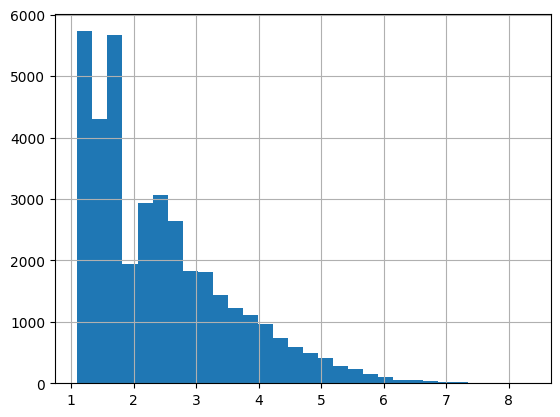

In [106]:
yelp_df['review_count'].apply(np.log).hist(bins=30)

<Axes: xlabel='Year'>

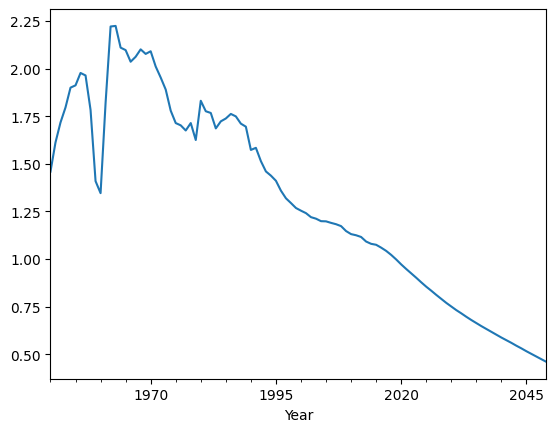

In [107]:
pop_growth['Annual Growth Rate (%)'].plot()

Las [funciones de representación gráfica toman muchos parámetros](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) para personalizar la apariencia de la salida. Dado que son esencialmente un contenedor de las funciones de Matplotlib, también aceptan muchos de los parámetros de Matplotlib, no todos los cuales se encuentran en la documentación de Pandas. Pandas proporciona [una guía](https://pandas.pydata.org/pandas-docs/stable/visualization.html) para crear varios gráficos a partir de DataFrames.